# In this notebook we would like to get a feeling for the reference datbase
Lets import the cleanred reference database which you need to download form here [*Database*](https://drive.google.com/drive/folders/1OLql-G3klodLDTHCIkcC0m-5S-3VN7nZ?usp=sharing)

In [18]:
# load libraries
import json
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [2]:
database = "Database/cleaned_final_low_resoloution_FaceDB.json"
db = json.loads(open(database).read())

f"we can see the reference database consists of {len(db)} subdatabases each consisting the encoding and labels of the same faces in different resolutions {list(db.keys())}"

"we can see the reference database consists of 5 subdatabases each consisting the encoding and labels of the same faces in different resolutions ['24', '32', '40', '48', '64']"

![alt_text](pics/database_resolutions.png)

The structure of the database is the following
```
datbase
│
└───24
│   │
│   └───Sandro
│   │   └──encodings
│   │   │  ...
│   │   └──paths
│   │      ...
│   │
│   └───Caren
│   │   └──encodings
│   │   │  ...
│   │   └──paths
│   │      ...
│   └───...
└───32
│   │
│   └───Sandro
│   │   └──encodings
│   │   │  ...
│   │   └──paths
│   │      ...
│   │
│   └───Caren
│   │   └──encodings
│   │   │  ...
│   │   └──paths
│   │      ...
│   └───...
└───...
│
...   
│   
└───64
    │
    └───Sandro
    │   └──encodings
    │   │  ...
    │   └──paths
    │      ...
    │
    └───Caren
    │   └──encodings
    │   │  ...
    │   └──paths
    │      ...
    └───...

```

so as I mentioned each face has 5 version of itself in 5 different resolution. within a certain resolution you will find the all the profiles of the different people as including all the encodings of all the faces for that specific person. In addition we also tracked from where these example faces came from

Now where we understand the structure of the database. Lets write a helper function that we can play with the encoding of the faces.


In [3]:
# some other helper functions
def rep(x):
    return [x[0]] * x[1]

def load_database(database="Database/cleaned_final_low_resoloution_FaceDB.json"):

    db = json.loads(open(database).read())
    res = list(db.keys())
    
    db2 = {res[0]: {k: np.vstack(v["encodings"]) for k,v in db[res[0]].items()}}
    len_db = {res[0]: list(map(len, list(db2[res[0]].values())))}
    nest = {res[0]: list(map(rep, zip(list(db2[res[0]].keys()), len_db[res[0]])))}
    names = {res[0]: list(chain(*nest[res[0]]))}

    for r in res[1:]:
        db2.update({r: {k: np.vstack(v["encodings"]) for k,v in db[r].items()}})
        len_db.update({r: list(map(len, list(db2[r].values())))})
        nest.update({r: list(map(rep, zip(list(db2[r].keys()), len_db[r])))})
        names.update({r: list(chain(*nest[r]))})
    
    arr = {k: (np.vstack(list(v.values())), names[k]) for k,v in db2.items()}
    
    return arr

Lets work with the sub-database with the highest resolution for now.

In [6]:
arr = load_database(database=database)
X, y = arr["64"]

In [7]:
f"So there are {len(X)} encodings with a size of {X.shape[1]} - yes its exactly the output size of FaceNet."

'So there are 8409 encodings with a size of 128 - yes its exactly the output size of FaceNet.'

In [46]:
COUNTS = dict(Counter(y))
COUNTS_sort = sorted(COUNTS.items(), key=lambda x: x[1])
print(f"These {len(X)} encodings originate from {len(COUNTS)} indviduals. You can also see that the range of how many faces are given for\neach individual are very broad {np.min(list(COUNTS.values()))}-{np.max(list(COUNTS.values()))} face examples per person") 
COUNTS_sort

These 8409 encodings originate from 84 indviduals. You can also see that the range of how many faces are given for
each individual are very broad 2-2525 face examples per person


[('Stefania', 2),
 ('Franka', 4),
 ('Nora_Tröndlin', 10),
 ('Herr_Möske', 11),
 ('Mary', 12),
 ('Frau_Möske', 12),
 ('Katharina_I_Murg', 12),
 ('Ifrahim', 15),
 ('Janine_Möske', 15),
 ('Thomas_Tröndlin', 16),
 ('Tina', 16),
 ('Erik', 17),
 ('Daniela', 17),
 ('Kerstin', 17),
 ('Jochen_Weber', 18),
 ('Sandra_Bürchner', 18),
 ('Giusppe_Rotolo', 19),
 ('Melanie', 20),
 ('Massimo', 20),
 ('Noeli_Müller', 20),
 ('Iris_Bruno', 21),
 ('Matthias_Tröndle', 21),
 ('Stefan_Streuber', 22),
 ('Katharina_II_Murg', 23),
 ('Claudia', 23),
 ('Leonie', 23),
 ('Josi_Dulemont', 23),
 ('Jaqueline_Odermatt', 23),
 ('Pino_Bruno', 23),
 ('Marion', 24),
 ('Georg', 24),
 ('Ladina_Odermatt', 24),
 ('Sabrina', 25),
 ('Kyla_Bruno', 25),
 ('Anna_Klockhof', 26),
 ('Edeltraut_Schneider', 26),
 ('Martin', 27),
 ('Theresa_Reith', 27),
 ('Prathip', 28),
 ('Philipp_Evonik', 28),
 ('Philipp', 28),
 ('Sigrid_Leber', 29),
 ('Hainer_Schneider', 29),
 ('Silvia', 30),
 ('Yannick_Haas', 30),
 ('Rose', 30),
 ('Joe_Danz', 30),
 ('

Next lets focus on my close family my ..
+ myself (blue)
+ two kids **Kyla** (turqouise) and **Zola** (purple)
+ wife **Caren** (red)
+ mother in law **Maureen** (green)
+ father in law **Hubert** (orange)
+ sisters brother **Stefan** (yellow)

Can we see signs that allows us to relate the encodings of our faces to each of us. In otherwise could we use the encodings to see the similarity between people and itself. Here we are estimating this with a principal component analysis (PCA)

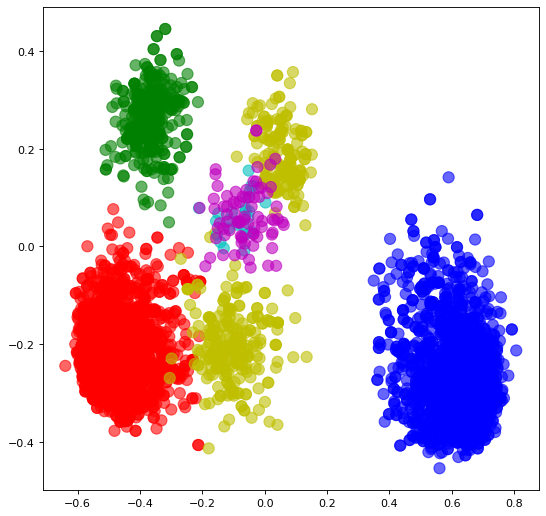

In [37]:
figure(figsize=(8, 8), dpi=80)
pca = PCA(n_components=2)
pca = pca.fit_transform(X)

categories = np.array([0]* COUNTS["Caren_Bruno"] + [6]*COUNTS["Hubert_Leber"] + [3]*COUNTS["Stefan_Leber"]  + 
                      [1]*COUNTS["Sandro_Bruno"] + [2] * COUNTS["Maureen_Leber"] + [5]*COUNTS["Kyla_Bruno"] + [4]*COUNTS["Zola_Bruno"] )

colormap = np.array(['r', 'b', 'g', 'y', 'm', 'c', 'y'])

# plt.scatter(pca2[:,0], pca2[:,1], s=20, alpha=0.2)#, c=colormap[categories])
plt.scatter(pca[[True if (i == "Sandro_Bruno") or (i == "Caren_Bruno") or (i == "Hubert_Leber") or (i == "Kyla_Bruno") or (i == "Maureen_Leber") or (i == "Stefan_Leber") or (i == "Zola_Bruno")  else False for i in y],0], 
            pca[[True if (i == "Sandro_Bruno") or (i == "Caren_Bruno") or (i == "Hubert_Leber") or (i == "Kyla_Bruno") or (i == "Maureen_Leber") or (i == "Stefan_Leber") or (i == "Zola_Bruno") else False for i in y],1],
           c=colormap[categories], alpha=0.6, s=100)
# plt.scatter(pca[[True if i == "Hubert_Leber" else False for i in y],0], pca[[True if i == "Hubert_Leber" else False for i in y],1],
#            )

Very interesting this plot! First the different profiles are very clean and dense around its own class therefore valid to use any predictoion model.  

We can distinguish the different familiy members from each other. It makes also sense that Iam (blue) most disimilar to all the close family members of my wife (besides my kids :-P but I must admit my kids look more like my wife :-D). We can see that only my kids are not distinguishable from each other. This may be because they are both very young (pictures range from 1-3 years old. Now they are 2,3 years) an I guess at the begining you babys look very similar or the embeddings are providing us just the information that this is a kids face. Or my two kids are just very similar - which they are I must say - maybe the reason that both are just 1.5 years a part also contributes to it (something we need to investigate further).

Also the kids of my parents in law are more similar to each other than the parents. Overall, this shows us that we can indeed use the encodings to make predictions. However, because our reference database shows such a big difference in the example faces for each individual 2-2525 we need a prediction model that is weighting in the class size of the reference database as it might be more likely that a person get matched with a new face just because there are more examples more variation of that person captured